In [2]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Step 2: Create synthetic dataset (Objective 1)
np.random.seed(42)
n_samples = 1000
labels = np.random.choice([0, 1], size=n_samples, p=[0.7, 0.3])  # 70% normal, 30% fault
noise_indices = np.random.choice(n_samples, size=int(0.05 * n_samples), replace=False)
labels[noise_indices] = 1 - labels[noise_indices]  # 5% label noise
lidar_distance = np.random.normal(loc=60 - 7 * labels, scale=7 + 4 * labels, size=n_samples)
lidar_reflectivity = np.random.normal(loc=0.75 - 0.3 * labels, scale=0.15, size=n_samples)
steering_angle = np.random.normal(loc=0 + 3 * labels, scale=4 + 3 * labels, size=n_samples)
actuator_response = np.random.normal(loc=60 + 80 * labels, scale=20, size=n_samples)
wheel_speed_diff = np.random.normal(loc=1 + 1.5 * labels, scale=2.0, size=n_samples)
object_misclassification_rate = np.random.normal(loc=0.1 + 0.2 * labels, scale=0.07, size=n_samples)
object_misclass_fault = np.zeros(n_samples)
misclass_indices = np.where(labels == 1)[0]
selected_for_misclass = np.random.choice(misclass_indices, size=int(0.5 * len(misclass_indices)), replace=False)
object_misclass_fault[selected_for_misclass] = 1

data = pd.DataFrame({
    'lidar_distance': lidar_distance,
    'lidar_reflectivity': lidar_reflectivity,
    'steering_angle': steering_angle,
    'actuator_response': actuator_response,
    'wheel_speed_diff': wheel_speed_diff,
    'object_misclassification_rate': object_misclassification_rate,
    'object_misclass_fault': object_misclass_fault,
    'Fault_Status': labels
})
X = data.drop(columns='Fault_Status')
y = data['Fault_Status']

In [4]:
# Export first 10 rows for presentation
data.head(10).to_csv('dataset_sample.csv', index=False)

In [5]:
# Group by Fault_Status and compute means
stats = data.groupby('Fault_Status').mean()
print(stats)
# Save to CSV
stats.to_csv('dataset_stats.csv')

              lidar_distance  lidar_reflectivity  steering_angle  \
Fault_Status                                                       
0                  60.002222            0.759803       -0.329112   
1                  53.812835            0.445781        3.096127   

              actuator_response  wheel_speed_diff  \
Fault_Status                                        
0                     60.796907          0.998548   
1                    140.563659          2.584540   

              object_misclassification_rate  object_misclass_fault  
Fault_Status                                                        
0                                  0.099276                    0.0  
1                                  0.301155                    0.5  


In [6]:
# Step 3: Split into training and testing (Objective 2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Step 4: Scale the data (Objective 2)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Step 5: Set up and train models (Objective 2)
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=2000, solver='liblinear', random_state=42)
}

=== MODEL EVALUATION ===

Decision Tree Accuracy: 0.985
              precision    recall  f1-score   support

      Normal      0.987     0.993     0.990       148
      Faulty      0.980     0.962     0.971        52

    accuracy                          0.985       200
   macro avg      0.983     0.977     0.980       200
weighted avg      0.985     0.985     0.985       200



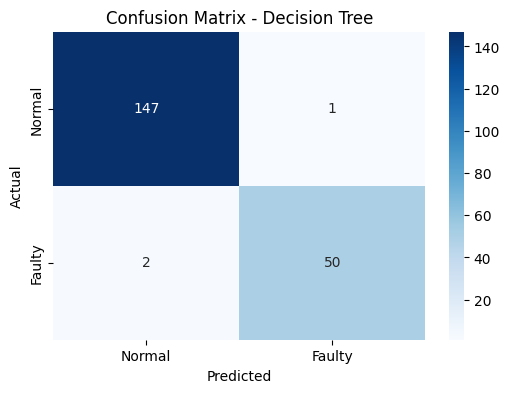


Random Forest Accuracy: 0.995
              precision    recall  f1-score   support

      Normal      0.993     1.000     0.997       148
      Faulty      1.000     0.981     0.990        52

    accuracy                          0.995       200
   macro avg      0.997     0.990     0.993       200
weighted avg      0.995     0.995     0.995       200



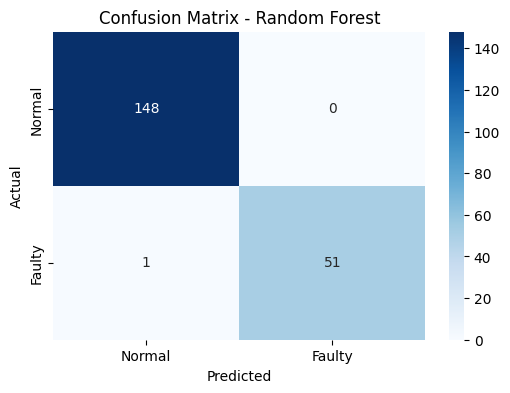


KNN Accuracy: 1.000
              precision    recall  f1-score   support

      Normal      1.000     1.000     1.000       148
      Faulty      1.000     1.000     1.000        52

    accuracy                          1.000       200
   macro avg      1.000     1.000     1.000       200
weighted avg      1.000     1.000     1.000       200



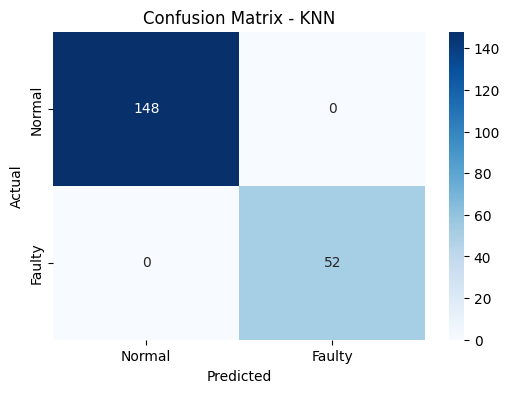


Logistic Regression Accuracy: 1.000
              precision    recall  f1-score   support

      Normal      1.000     1.000     1.000       148
      Faulty      1.000     1.000     1.000        52

    accuracy                          1.000       200
   macro avg      1.000     1.000     1.000       200
weighted avg      1.000     1.000     1.000       200



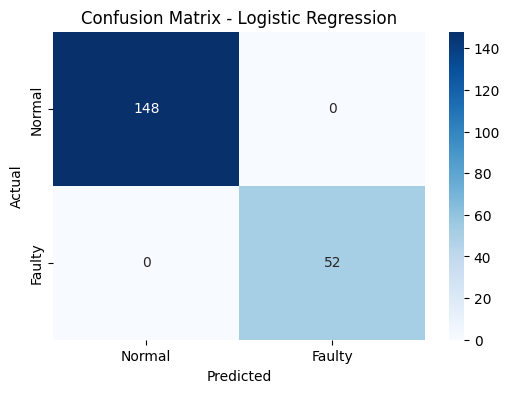

In [9]:
# Step 6: Evaluate models (Objective 3)
print("=== MODEL EVALUATION ===")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.3f}")
    print(classification_report(y_test, y_pred, digits=3, target_names=['Normal', 'Faulty']))
    
    # Confusion Matrix for visualization
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Faulty'], yticklabels=['Normal', 'Faulty'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [11]:
# Distribution plot for lidar_distance
plt.figure(figsize=(8, 4))
sns.histplot(data=data, x='lidar_distance', hue='Fault_Status', bins=30)
plt.title('LIDAR Distance Distribution: Normal vs. Faulty')
plt.savefig('lidar_distance_dist.png')
plt.close()

In [13]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Fault_Status', y='lidar_distance', data=data)
plt.title('LIDAR Distance by Fault Status')
plt.savefig('lidar_distance_box.png')
plt.close()

In [14]:
# Scale lidar_distance
scaler = StandardScaler()
data['lidar_distance_scaled'] = scaler.fit_transform(data[['lidar_distance']])
# Save table for slide
data[['lidar_distance', 'lidar_distance_scaled']].head().to_csv('scaled_sample.csv')
# Density plot
plt.figure(figsize=(6, 4))
sns.kdeplot(data=data, x='lidar_distance_scaled', hue='Fault_Status', fill=True)
plt.title('Scaled LIDAR Distance: Normal vs. Faulty')
plt.savefig('scaled_lidar_dist.png')
plt.close()